In [49]:
import numpy as np
from matplotlib import pyplot as plt

In [50]:
gamma = -1
w = 1

def timeEvol(t_ini, t_fin):
    dt = t_fin - t_ini
    dcos = np.cos(w*t_fin) - np.cos(w*t_ini)
    dsin = np.sin(w*t_fin) - np.sin(w*t_ini)

    u = np.array([[1 + .5j*dt, -(-1j*dsin + gamma*dcos)/w],
                  [(1j*dsin + gamma*dcos)/w, 1 - .5j*dt]])
    return u

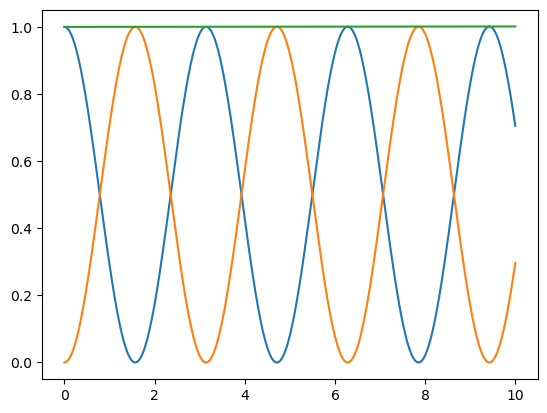

In [51]:
phi_0 = np.array([1, 0])

N = 100000
T = 10
time = np.linspace(0, T, N)
prop = np.ones(N)
prop2 = np.zeros(N)
dt = T/N


temp = phi_0
for ii in range(N-1):
    temp = np.einsum('ij, j', timeEvol(time[ii], time[ii+1]), temp)
    prop[ii+1] = np.abs(temp[0])**2
    prop2[ii+1] = np.abs(temp[1])**2

plt.plot(time, prop, time, prop2, time, prop + prop2)
plt.show()


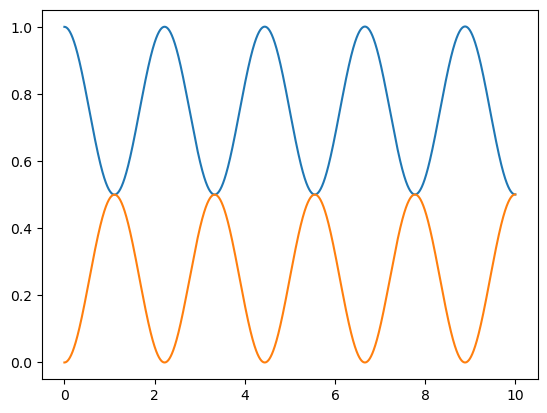

In [52]:
n=1

w = 1
def H(t): 
    return np.array([[.5, (np.cos(w*t)-1j*gamma*np.sin(w*t))],
                     [(np.cos(w*t)+1j*gamma*np.sin(w*t)), -.5]])

phi_t = np.zeros((N,2), dtype='complex')
phi_t[0] = phi_0

for ii in range(N-1):
    phi_t[ii+1] = phi_t[ii] - 1j*np.matmul(H(time[ii]), phi_t[ii])*dt

plt.plot(time, np.abs(phi_t[:,0])**2, time, np.abs(phi_t[:,1])**2)
plt.show()